In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fast_ml.model_development import train_valid_test_split
import tensorflow as tf
import keras
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
df1= pd.read_csv("C:\\Users\\sonaw\\Desktop\\diabetes.csv")
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df1.isnull().values.any()

False

In [4]:
X_train1, Y_train1, X_valid1, Y_valid1, X_test1, Y_test1 = train_valid_test_split(df1, target = 'Outcome',
                                                                            train_size=0.6, valid_size=0.2, test_size=0.2, 
                                                                            method= 'random',random_state = 75)


In [5]:
print("X train Y train: ",X_train1.shape, Y_train1.shape)
print("X validation Y validation: ",X_valid1.shape, Y_valid1.shape)
print("X test Y test: ",X_test1.shape, Y_test1.shape)

X train Y train:  (460, 8) (460,)
X validation Y validation:  (154, 8) (154,)
X test Y test:  (154, 8) (154,)


## PART I

In [6]:
#As the dataset values are in pandas dataframe we need to convert it into numpy arrays
X_train = X_train1.values
Y_train = Y_train1.values
X_valid = X_valid1.values
Y_valid = Y_valid1.values
X_test = X_test1.values
Y_test = Y_test1.values

In [7]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_valid = X_valid.T
Y_valid = Y_valid.reshape(1, X_valid.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [8]:
#Sigmoid Function
def sigmoid(x):
    
    return 1/(1 + np.exp(-x))

In [9]:
#Logistic Regression Model
def logreg(X, Y, l_rate, itr):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(itr):
        P = np.dot(W.T, X) + B
        sigma = sigmoid(P)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(sigma) + (1-Y)*np.log(1-sigma))
        cost_list.append(cost)
        
        # Gradient Descent
        dW = (1/m)*np.dot(sigma-Y, X.T)
        dB = (1/m)*np.sum(sigma - Y)
        
        W = W - l_rate*dW.T
        B = B - l_rate*dB
        
        
           
    return W, B, cost_list

In [10]:
def accuracy(X, Y, W, B): 
    
    P = np.dot(W.T, X) + B
    sigma = sigmoid(P)
    
    sigma = sigma > 0.5
    
    #converting sigma values into integer
    sigma_pred = np.array(sigma, dtype = 'int64')
    
    accuracy = (1 - np.sum(np.absolute(sigma_pred - Y))/Y.shape[1])*100
    
    print("The accuracy of the model is: ",accuracy, "%")

In [11]:
itr = 400000
l_rate = 0.00026
W, B, cost_list = logreg(X_train, Y_train, l_rate = l_rate, itr = itr)

In [12]:
accuracy(X_test, Y_test, W, B)

The accuracy of the model is:  78.57142857142857 %


In [13]:
accuracy(X_valid, Y_valid, W, B)

The accuracy of the model is:  76.62337662337663 %


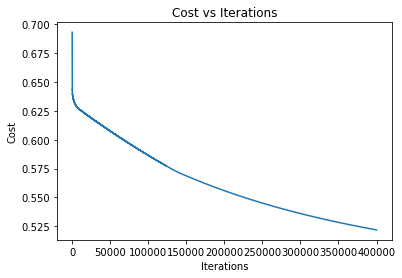

In [14]:
plt.plot(np.arange(itr), cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

## PART II 

In [15]:
#neural network with l1 and l2 regularization. 

tf.random.set_seed(21)

model_reg = Sequential()

model_reg.add(Dense(8,kernel_regularizer='l2', activation='relu', input_dim=8))  # Hidden Layer.
model_reg.add(Dense(5,kernel_regularizer='l1', activation='relu')) # Hidden Layer.
model_reg.add(Dense(3,kernel_regularizer='l2', activation='relu')) # Hidden Layer.
model_reg.add(Dense(1, activation='sigmoid'))  # Output Layer.

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_reg.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])

print(model_reg.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
NNmix = model_reg.fit(X_train1, Y_train1, batch_size=128, epochs=1000, validation_data=(X_valid1, Y_valid1))
loss_regtest, accuracy_regtest = model_reg.evaluate(X_test1,Y_test1, verbose=0)

Epoch 1/1000
4/4 [==============================] - 1s 69ms/step - loss: 10.0147 - accuracy: 0.4348 - val_loss: 4.3311 - val_accuracy: 0.4870
Epoch 2/1000
4/4 [==============================] - 0s 7ms/step - loss: 2.9406 - accuracy: 0.4891 - val_loss: 1.6900 - val_accuracy: 0.6234
Epoch 3/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.9454 - accuracy: 0.6435 - val_loss: 2.2325 - val_accuracy: 0.6364
Epoch 4/1000
4/4 [==============================] - 0s 7ms/step - loss: 2.0391 - accuracy: 0.6543 - val_loss: 1.8455 - val_accuracy: 0.6364
Epoch 5/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.5976 - accuracy: 0.6543 - val_loss: 1.2823 - val_accuracy: 0.6364
Epoch 6/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.1254 - accuracy: 0.6543 - val_loss: 0.8895 - val_accuracy: 0.6364
Epoch 7/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.8613 - accuracy: 0.6457 - val_loss: 0.8812 - val_accuracy: 0.6299
Epoch 8/1000
4/4 [

In [17]:
print("L1 L2 Loss for test data: "+str(loss_regtest))
print("L1 L2 Accuracy for test data:"+str(accuracy_regtest*100.0))

L1 L2 Loss for test data: 0.514212965965271
L1 L2 Accuracy for test data:80.51947951316833


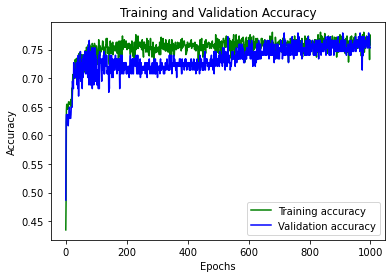

In [18]:
acc_train = NNmix.history['accuracy']
acc_val = NNmix.history['val_accuracy']
epochs = range(0,1000)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

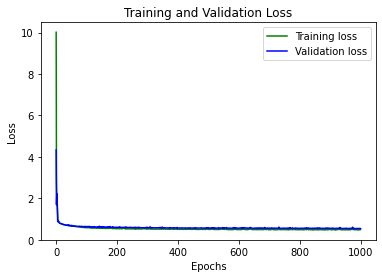

In [19]:
loss_train = NNmix.history['loss']
loss_val = NNmix.history['val_loss']
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## PART III

In [20]:
#neural network with dropout regularization

np.random.seed(300)
#tf.random.set_seed(190)
model_do = Sequential() 

model_do.add(Dense(16, activation='relu', input_dim=8)) # Hidden layer. 
model_do.add(Dropout(0.1))
model_do.add(Dense(8, activation='relu')) # Hidden layer. 
model_do.add(Dropout(0.1))
model_do.add(Dense(1, activation='sigmoid')) # Output layer. 

opt = tf.keras.optimizers.Adam(learning_rate=0.01) 
model_do.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])

print(model_do.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
NNdo = model_do.fit(X_train1, Y_train1, batch_size=32, epochs=1000, validation_data=(X_valid1, Y_valid1),shuffle=False)
loss_drop, accuracy_drop = model_do.evaluate(X_test1,Y_test1, verbose=0)


Epoch 1/1000
15/15 [==============================] - 1s 10ms/step - loss: 8.4681 - accuracy: 0.4565 - val_loss: 1.7240 - val_accuracy: 0.5909
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 1.9377 - accuracy: 0.5435 - val_loss: 0.9040 - val_accuracy: 0.4675
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.7652 - accuracy: 0.5674 - val_loss: 0.6689 - val_accuracy: 0.6364
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6435 - val_loss: 0.6610 - val_accuracy: 0.6429
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.6435 - val_loss: 0.6581 - val_accuracy: 0.6429
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.6500 - val_loss: 0.6580 - val_accuracy: 0.6299
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.6500 - val_loss: 0.6581 - val_accuracy: 0.6299
Epoch

In [22]:
print("Dropout Loss for test data: "+str(loss_drop))
print("Dropout Accuracy for test data:"+str(accuracy_drop*100.0))

Dropout Loss for test data: 0.5032451748847961
Dropout Accuracy for test data:77.92207598686218


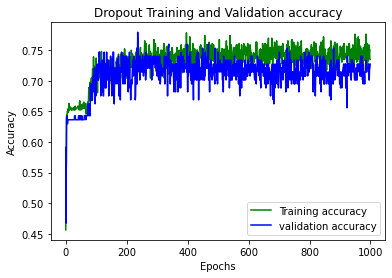

In [23]:
Dacc_train = NNdo.history['accuracy']
Dacc_val = NNdo.history['val_accuracy']
epochs = range(0,1000)
plt.plot(epochs, Dacc_train, 'g', label='Training accuracy')
plt.plot(epochs, Dacc_val, 'b', label='validation accuracy')
plt.title('Dropout Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

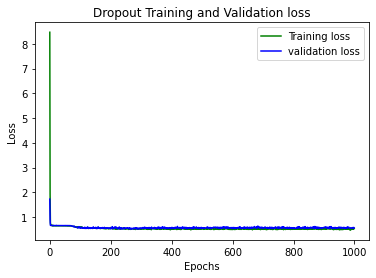

In [24]:
Dloss_train = NNdo.history['loss']
Dloss_val = NNdo.history['val_loss']
plt.plot(epochs, Dloss_train, 'g', label='Training loss')
plt.plot(epochs, Dloss_val, 'b', label='validation loss')
plt.title('Dropout Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
#neural network with l1 regularization

np.random.seed(300)
model_l1 = Sequential() 

model_l1.add(Dense(16,kernel_regularizer='l1', activation='relu', input_dim=8)) # Hidden layer. 
model_l1.add(Dense(8,kernel_regularizer='l1', activation='relu')) # Hidden layer. 
model_l1.add(Dense(1, activation='sigmoid')) # Output layer. 

opt = tf.keras.optimizers.Adam(learning_rate=0.01) 
model_l1.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])

print(model_l1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
NNl1 = model_l1.fit(X_train1, Y_train1, batch_size=32, epochs=1000, validation_data=(X_valid1, Y_valid1))
loss_l1, accuracy_l1 = model_l1.evaluate(X_test1,Y_test1, verbose=0)

Epoch 1/1000
15/15 [==============================] - 1s 11ms/step - loss: 4.4364 - accuracy: 0.5630 - val_loss: 2.3025 - val_accuracy: 0.4026
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 2.0323 - accuracy: 0.5283 - val_loss: 1.3407 - val_accuracy: 0.5065
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 1.4814 - accuracy: 0.5413 - val_loss: 1.4757 - val_accuracy: 0.4221
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.2205 - accuracy: 0.6109 - val_loss: 1.0652 - val_accuracy: 0.6688
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.1132 - accuracy: 0.6217 - val_loss: 1.0217 - val_accuracy: 0.6558
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.0525 - accuracy: 0.6565 - val_loss: 0.9709 - val_accuracy: 0.6494
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.0121 - accuracy: 0.6587 - val_loss: 0.9364 - val_accuracy: 0.7143
Epoch

In [27]:
print("L1 Loss for test data: "+str(loss_l1))
print("L1 Accuracy for test data:"+str(accuracy_l1*100.0))

L1 Loss for test data: 0.5255898833274841
L1 Accuracy for test data:76.6233742237091


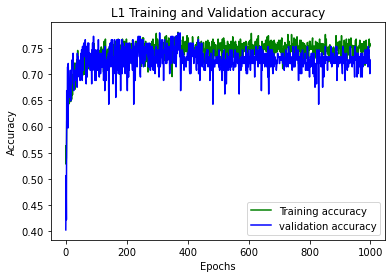

In [28]:
Racc_train = NNl1.history['accuracy']
Racc_val = NNl1.history['val_accuracy']
epochs = range(0,1000)
plt.plot(epochs, Racc_train, 'g', label='Training accuracy')
plt.plot(epochs, Racc_val, 'b', label='validation accuracy')
plt.title('L1 Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

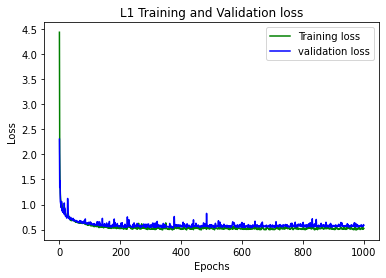

In [29]:
Rloss_train = NNl1.history['loss']
Rloss_val = NNl1.history['val_loss']
plt.plot(epochs, Rloss_train, 'g', label='Training loss')
plt.plot(epochs, Rloss_val, 'b', label='validation loss')
plt.title('L1 Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
77.92
76.62

76.62

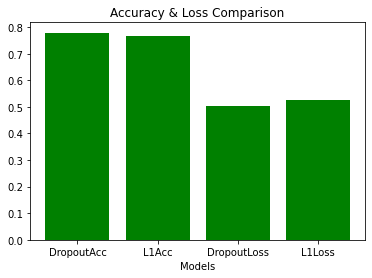

In [85]:
x=['DropoutAcc','L1Acc','DropoutLoss','L1Loss']
acc=[accuracy_drop,accuracy_l1,loss_drop,loss_l1]
plt.bar(x,acc, color='green')
plt.title('Accuracy & Loss Comparison')
plt.xlabel('Models')
plt.ylabel('')
plt.show()
